In [32]:
from PIL import Image
from PIL.ExifTags import TAGS
from pathlib import Path 
import exiftool

def get_metadata(path):
    with exiftool.ExifToolHelper() as et:
        metadata = et.get_metadata(path)
        return metadata




Linux: sudo apt install libimage-exiftool-perl

poetry add pyexiftool

In [55]:
folder_path = Path("/home/clem/Documents/Affaire Victoire/Photos Videos prises avec mon téléphone/Swann")

result_dates = []

for file in folder_path.iterdir():
    if file.suffix != ".jpg":
        continue

    metadata = get_metadata(file)

    for key, value in metadata[0].items():
        if "File:FileModifyDate" == key:
            result_dates.append(value)
    

In [73]:
result_dates[0][:19]

'2024:11:02 16:07:49'

In [78]:
import pandas as pd

date_df = pd.DataFrame({"date": result_dates})
# date_df["date"] = pd.to_datetime(date_df["date"], utc=True)

date_df["datetime"] = pd.to_datetime(date_df["date"].str[:19], format="%Y:%m:%d %H:%M:%S")
date_df.dtypes

date                object
datetime    datetime64[ns]
dtype: object

<Axes: >

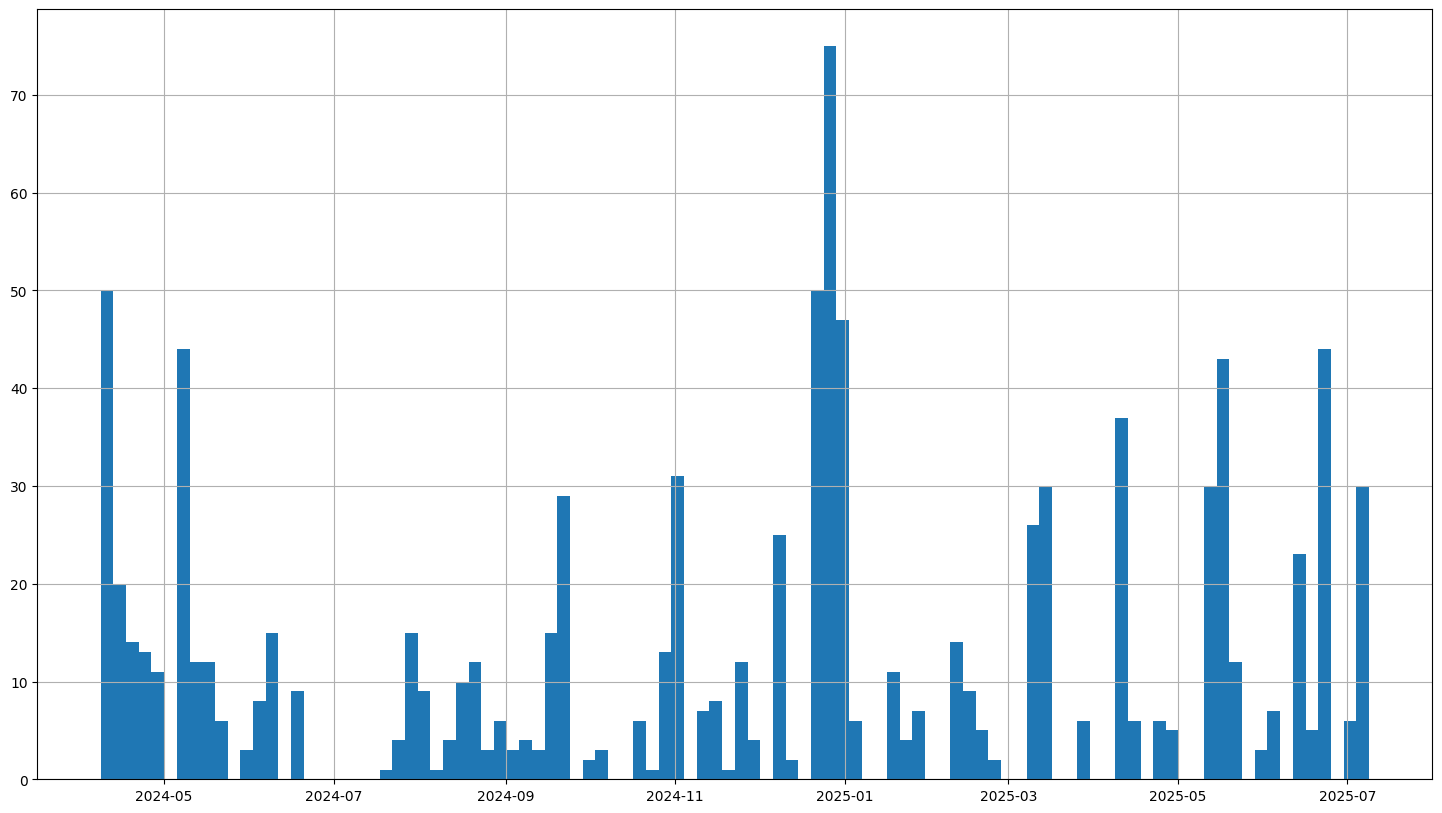

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
date_df["datetime"].sort_values().hist(bins=100, figsize=(18,10))